# COMP30850 <font color='green'>ASSIGNMENT 2 - NETWORK ANALYSIS</font>

## <font color='green'>Objective</font>

>- The goal of this <b>assignment</b> is to <b>construct</b> and <b>characterise </b> a range of network
representations, created from pre-collected <b> Twitter data</b> for a specific <b>Twitter List of
user accounts</b> which relate to a particular topic (e.g. technology, sports news etc).
>- The assignment should be implemented as a single Jupyter Notebook (not a script).
Your notebook should be clearly documented, using comments and Markdown cells to
explain your code and analysis. Use tables, charts, and visualisations where
appropriate to support your results
***
<font color='blue'>Our goals are to perform these 5 tasks using the <b><font color='black'>NetworkX</font></b> package from python</font> 
<i>
>- <b>Follower Network</b>
>- <b>Reply Network</b>
>- <b>Mention Network</b>
>- <b>User-hashtag Network</b>
>- <b>Hashtag co-occurrence network</b></i>
<img src="twitter.jpg" width="500" height="500">


### <font color='green'> SOURCE</font> OF THE DATA

We download our 2 personal datasets from the url below , which are in a single ZIP file at:
<br>
I have chosen the <b>business</b> topic
***

http://mlg.ucd.ie/modules/COMP30850/assignment2.html

##  <font color='green'>TASK</font> 1

>-  Here each node in the network should represent a user from your list

## Importing all the necessary libraries for working on the data and visualizations(networkx package and other important libraries

In [131]:
import sys
import json, itertools
from collections import Counter
import networkx as nx
import pandas as pd
from networkx.algorithms import bipartite
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data from friendships in a dataframe data_follower

In [64]:
data_follower = pd.read_csv("friendships.csv", sep='\t', header = None)
data_follower

,0,1
0,apbusiness,bbcbusiness
1,apbusiness,business
2,apbusiness,businessinsider
3,apbusiness,bw
4,apbusiness,cnnbusiness
5,apbusiness,fastcompany
6,apbusiness,financialtimes
7,apbusiness,forbes
8,foxbusiness,apbusiness
9,apbusiness,foxbusiness


### Creating a directed network

In [65]:
graph_1 = nx.DiGraph()
for i, row in data_follower.iterrows():
    graph_1.add_edge( row[0], row[1])

### Printing the general information about the network using info function

In [67]:
print(nx.info(graph_1))

Name: 
Type: DiGraph
Number of nodes: 32
Number of edges: 300
Average in degree:   9.3750
Average out degree:   9.3750


### Printing all the edges in the network

In [68]:
print("Edges in G: ", graph_1.edges(data=True))

Edges in G:  [('apbusiness', 'bbcbusiness', {}), ('apbusiness', 'business', {}), ('apbusiness', 'businessinsider', {}), ('apbusiness', 'bw', {}), ('apbusiness', 'cnnbusiness', {}), ('apbusiness', 'fastcompany', {}), ('apbusiness', 'financialtimes', {}), ('apbusiness', 'forbes', {}), ('apbusiness', 'foxbusiness', {}), ('apbusiness', 'ft', {}), ('apbusiness', 'ftfinancenews', {}), ('apbusiness', 'harvardbiz', {}), ('apbusiness', 'markets', {}), ('apbusiness', 'marketwatch', {}), ('apbusiness', 'nasdaq', {}), ('apbusiness', 'nbcnewsbusiness', {}), ('apbusiness', 'nytimesbusiness', {}), ('apbusiness', 'reutersbiz', {}), ('apbusiness', 'thestreet', {}), ('apbusiness', 'usatodaymoney', {}), ('apbusiness', 'wsj', {}), ('apbusiness', 'wsjbusiness', {}), ('apbusiness', 'wsjecon', {}), ('bbcbusiness', 'bbcworldbiz', {}), ('bbcbusiness', 'business', {}), ('bbcbusiness', 'bw', {}), ('bbcbusiness', 'financialtimes', {}), ('bbcbusiness', 'nytimesbusiness', {}), ('bbcbusiness', 'reutersbiz', {}), ('b

### Creating and displaying the unweighted directed graph

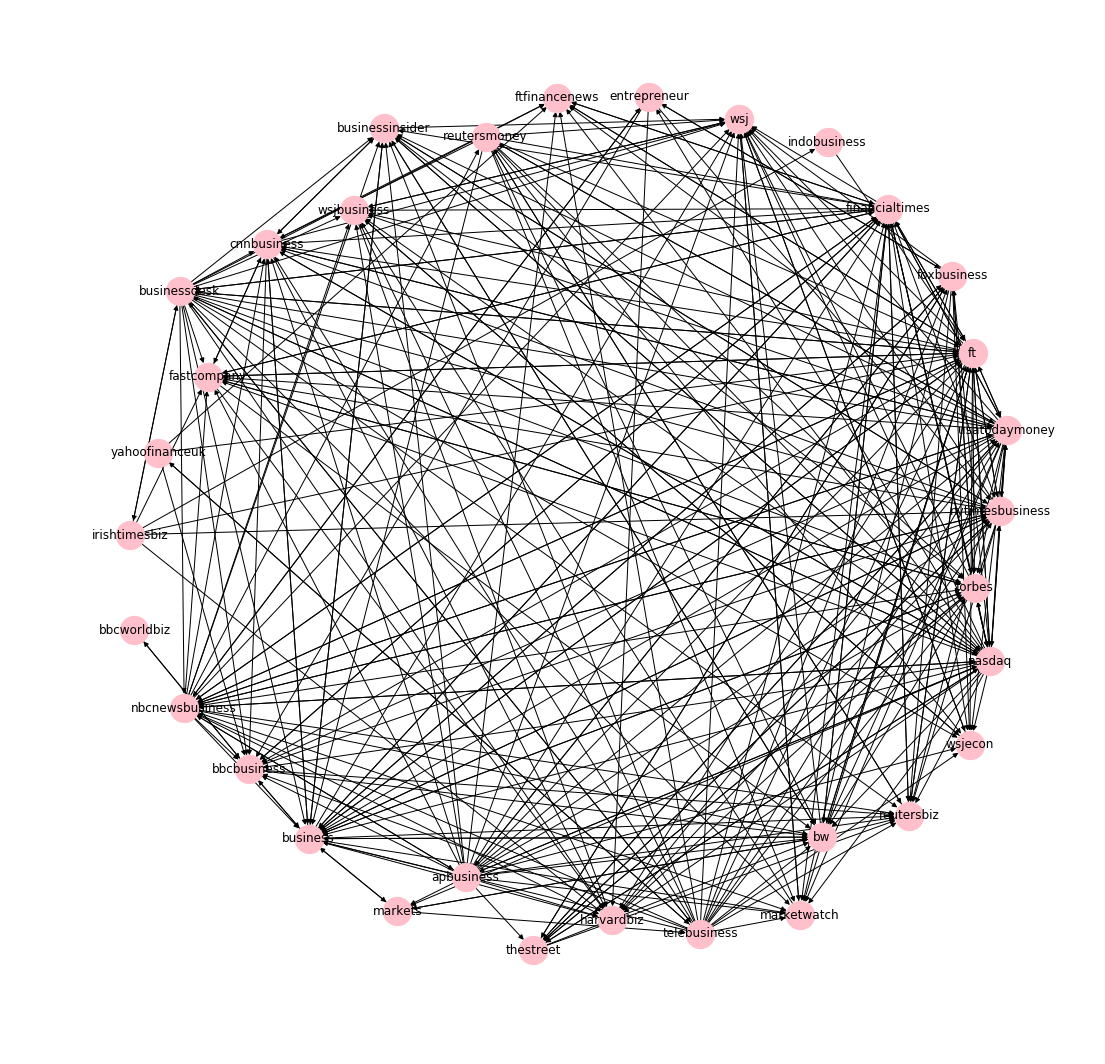

In [70]:
plt.figure(figsize=(19,19))
pos = nx.spring_layout( graph_1, k = 5.4 )
#drawing the graph with node size 800 and color = pink
nx.draw_networkx( graph_1, pos, with_labels=True, node_size=800, node_color="pink" )
plt.axis("off")
plt.show()#print the graph

### Printing the number of nodes and edges of the graph

In [134]:
print("No of nodes for Follower network: ", graph_1.number_of_nodes())


No of nodes for Follower network:  32


In [135]:
print("No of edges for Follower network: ", graph_1.number_of_edges())


No of edges for Follower network:  300


### Printing the density of the graph

In [72]:
density = nx.density(graph_1)
print("density of the network:", density)

density of the network: 0.3024193548387097


#### Transitivity is the ratio of all triangles over all possible triangles.So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.Transitivity allows us a way of thinking about all the relationships in your graph that may exist but currently do not.

In [73]:
triadic_closure = nx.transitivity(graph_1)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.4033457249070632


### Checks if the network is directed

In [74]:
print("Is Follower network directed?: ", nx.is_directed(graph_1))

Is Follower network directed?:  True


### Centrality measures for the graph

In [132]:
#degree-centraility
deg_1 = nx.degree_centrality(graph_1)
s_1 = pd.Series(deg_1)
data_task_1 = pd.DataFrame(s_1,columns=["degree_centrality"])
#betweenness

bet_1 = nx.betweenness_centrality(graph_1)
data_task_1["betweenness"] = pd.Series(bet_1)
#
#closeness centrality
close_1 = nx.closeness_centrality(graph_1)
data_task_1["closeness"] = pd.Series(close_1)
#eigen vector
eig_1 = nx.eigenvector_centrality(graph_1)
data_task_1["eigenvector"] = pd.Series(eig_1)
# norm eigenvector
data_task_1["norm_eigenvector"] = data_task_1["eigenvector"]/max(data_task_1["eigenvector"])

#sorting the data and printing it
data_task_1.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
ft,1.161290,0.119832,0.605735,0.239688,0.684789
nasdaq,1.161290,0.083922,0.507127,0.184224,0.526327
financialtimes,1.064516,0.085332,0.573854,0.234296,0.669385
usatodaymoney,1.032258,0.024001,0.519201,0.165087,0.471654
business,1.000000,0.055221,0.623041,0.284991,0.814219
nbcnewsbusiness,0.935484,0.039000,0.495601,0.132433,0.378360
businessdesk,0.838710,0.086759,0.436129,0.073703,0.210570
nytimesbusiness,0.838710,0.031131,0.589364,0.223859,0.639565
apbusiness,0.838710,0.011380,0.363441,0.044858,0.128158
telebusiness,0.741935,0.057402,0.325469,0.017057,0.048731


### Get ranking of the nodes

In [133]:
rank_data=data_task_1["betweenness"].rank(ascending = False)
rank_data.sort_values()

ft                  1.0
businessdesk        2.0
financialtimes      3.0
nasdaq              4.0
bbcbusiness         5.0
telebusiness        6.0
business            7.0
nbcnewsbusiness     8.0
nytimesbusiness     9.0
irishtimesbiz      10.0
markets            11.0
usatodaymoney      12.0
bw                 13.0
foxbusiness        14.0
forbes             15.0
reutersbiz         16.0
apbusiness         17.0
cnnbusiness        18.0
wsj                19.0
reutersmoney       20.0
wsjbusiness        21.0
thestreet          22.0
fastcompany        23.0
businessinsider    24.0
entrepreneur       25.0
marketwatch        26.0
ftfinancenews      27.0
wsjecon            28.0
harvardbiz         30.5
bbcworldbiz        30.5
yahoofinanceuk     30.5
indobusiness       30.5
Name: betweenness, dtype: float64

### Conclusion- Task 1
>-  Each each edge represents the relationship between the user and Nodes represent the users  and it's follower .
>- Network is directed
>- From the above table we notice that <b> ft </b>has the highest statistics in terms of centrality measures.


##  <font color='green'>TASK</font> 2

>-  Here nodes will either be users from your list or users from the wider Twitter
platform - i.e. users who are not necessarily members of the list, but
received replies from users on the list.


### Reading the tweet json file

In [136]:
fin = open( "tweets.jsonl", "r" )
tweets = []
for line in fin.readlines():
    line = line.strip()   
    tweet = json.loads(line)
    tweets.append(tweet)
fin.close()

print(len(tweets))

16000


In [137]:
data_tweets = pd.DataFrame(tweets)

### Displaying the first 10 tweets data

In [81]:
data_tweets.head(10) #displaying dataframe

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Fri Jan 22 18:08:17 +0000 2021,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,225,False,The U.K. coronavirus variant may be more deadl...,None,...,NaN,NaN,NaN,NaN,141,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 3108351, 'id_str': '3108351', 'name': '..."
1,None,None,Sat Jan 16 14:11:02 +0000 2021,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,169,False,They’re all hard to improve because they run c...,None,...,NaN,NaN,NaN,NaN,55,False,NaN,"<a href=""https://sproutsocial.com"" rel=""nofoll...",False,"{'id': 14800270, 'id_str': '14800270', 'name':..."
2,None,None,Wed Jan 06 12:03:15 +0000 2021,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,8,False,London’s lost EU share trading could be gone f...,None,...,NaN,NaN,NaN,NaN,3,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 11014272, 'id_str': '11014272', 'name':..."
3,None,None,Sun Jan 24 02:30:10 +0000 2021,"[0, 245]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,132,False,New research has increased worries that the im...,None,...,NaN,NaN,NaN,NaN,64,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 3108351, 'id_str': '3108351', 'name': '..."
4,None,None,Sun Jan 24 22:01:05 +0000 2021,"[0, 189]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,11,False,"For Adam Aron, who runs AMC Entertainment, the...",None,...,NaN,NaN,NaN,NaN,2,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 1754641, 'id_str': '1754641', 'name': '..."
5,None,None,Wed Oct 21 18:54:03 +0000 2020,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,14,False,Boeing is gauging interest a new single-aisle ...,None,...,NaN,NaN,NaN,NaN,2,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 28140646, 'id_str': '28140646', 'name':..."
6,None,None,Mon Jan 25 18:16:57 +0000 2021,"[0, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,64,False,Despite a punishing two weeks and relentless c...,None,...,NaN,NaN,NaN,NaN,26,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 34713362, 'id_str': '34713362', 'name':..."
7,None,None,Tue Sep 08 15:12:12 +0000 2020,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Thomas Cook to be revived as online travel fir...,None,...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 2252205206, 'id_str': '2252205206', 'na..."
8,None,None,Wed Sep 09 20:46:17 +0000 2020,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,JC Penney: Landlords plot rescue for departmen...,None,...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 2252205206, 'id_str': '2252205206', 'na..."
9,None,None,Thu Jan 21 17:16:18 +0000 2021,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,19,False,Ava DuVernay and Array will make exclusive aud...,None,...,NaN,NaN,NaN,NaN,8,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,"{'id': 2735591, 'id_str': '2735591', 'name': '..."


### Reading the members json file

In [138]:
users = []
fin = open( "list_members.jsonl", "r" )
for line in fin.readlines():
    line = line.strip()
    user = json.loads(line)
    users.append(user)
fin.close()

### Adding the user data in dataframe

In [141]:
user_data = pd.DataFrame(users)
user_data.head(10) #displaying the first 10 rows

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,...,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Mon Mar 02 20:42:11 +0000 2015,False,False,Top business news from The Associated Press. C...,{'url': {'urls': [{'url': 'http://t.co/w0XZAhi...,6,False,56866,False,...,False,False,APBusiness,{'created_at': 'Tue Jan 26 12:52:48 +0000 2021...,21594,None,none,http://t.co/w0XZAhi80M,None,True
1,False,Wed Dec 18 16:07:52 +0000 2013,False,False,Thank you for following @bbcworldbiz. We are n...,{'url': {'urls': [{'url': 'https://t.co/jJMgY9...,0,False,15175,False,...,True,False,BBCWorldBiz,{'created_at': 'Wed Oct 21 09:51:05 +0000 2020...,34116,None,none,https://t.co/jJMgY9Qtal,None,False
2,False,Wed Dec 08 14:15:39 +0000 2010,False,False,Your guide to wealth management,{'url': {'urls': [{'url': 'https://t.co/kjrU1C...,1429,False,34429,False,...,False,False,ReutersMoney,{'created_at': 'Mon Jan 25 19:59:45 +0000 2021...,32410,None,none,https://t.co/kjrU1Cpl0j,None,True
3,False,Mon Dec 07 14:48:07 +0000 2009,True,False,The Business and Technology feed from the @ind...,{'url': {'urls': [{'url': 'http://t.co/AShy0Rz...,11,False,15186,False,...,True,False,IndoBusiness,{'created_at': 'Fri Dec 18 13:15:12 +0000 2020...,24261,None,none,http://t.co/AShy0RzV6b,None,True
4,False,Sat Nov 21 02:09:57 +0000 2009,False,False,"Official Twitter account of Forbes, the world’...",{'url': {'urls': [{'url': 'http://t.co/KH6Etek...,10273,False,16517227,False,...,True,False,Forbes,{'created_at': 'Tue Jan 26 13:19:58 +0000 2021...,264616,None,regular,http://t.co/KH6EtekF5q,None,True
5,False,Fri Aug 28 15:52:42 +0000 2009,False,False,Breaking news and analysis on global financial...,{'url': {'urls': [{'url': 'http://t.co/coh4LwC...,134,False,790280,False,...,True,False,markets,{'created_at': 'Tue Jan 26 13:26:29 +0000 2021...,133506,None,none,http://t.co/coh4LwCPeW,None,True
6,False,Thu Aug 20 16:50:58 +0000 2009,False,False,Covering the business world like no one else. ...,{'url': {'urls': [{'url': 'https://t.co/qrSeHX...,1505,False,1787400,False,...,True,False,BW,{'created_at': 'Tue Jan 26 13:29:52 +0000 2021...,115205,None,none,https://t.co/qrSeHX6o20,None,True
7,False,Mon Jul 13 16:18:27 +0000 2009,False,False,The official Twitter page of FOX Business. Inv...,{'url': {'urls': [{'url': 'http://t.co/bfM3iji...,1,False,779944,False,...,True,False,FoxBusiness,{'created_at': 'Tue Jan 26 13:25:03 +0000 2021...,202406,None,none,http://t.co/bfM3iji7VB,None,True
8,False,Thu Apr 23 20:05:17 +0000 2009,False,False,The first word in business news.,{'url': {'urls': [{'url': 'http://t.co/YFISwy1...,1178,False,6921250,False,...,True,False,business,{'created_at': 'Tue Jan 26 13:26:41 +0000 2021...,648614,None,none,http://t.co/YFISwy1upH,None,True
9,False,Wed Apr 01 16:45:09 +0000 2009,False,False,The Wall Street Journal's Business editors sha...,{'url': {'urls': [{'url': 'http://t.co/usjQ6l3...,8,False,1608959,False,...,True,False,WSJbusiness,{'created_at': 'Fri Jan 22 00:48:04 +0000 2021...,68706,None,none,http://t.co/usjQ6l3GZ6,None,True


In [145]:
graph_2 = nx.DiGraph()
data_tweet_select=data_tweets.loc[data_tweets['in_reply_to_screen_name'] > '0']
print(data_tweet_select.shape)




(271, 31)


In [147]:
member_data = set()
for i, row in user_data.iterrows():
    member_data.add(row['screen_name'])
    
    
for i, row in data_tweet_select.iterrows():
        if row['user']['screen_name'] in member_data and row['user']['screen_name'] != row['in_reply_to_screen_name']:
            graph_2.add_edge(row['user']['name'], row['in_reply_to_screen_name'])

### Prints the general information of the graph

In [85]:
print(nx.info(graph_2))

Name: 
Type: DiGraph
Number of nodes: 58
Number of edges: 49
Average in degree:   0.8448
Average out degree:   0.8448


### Draws the graph using matplotlib

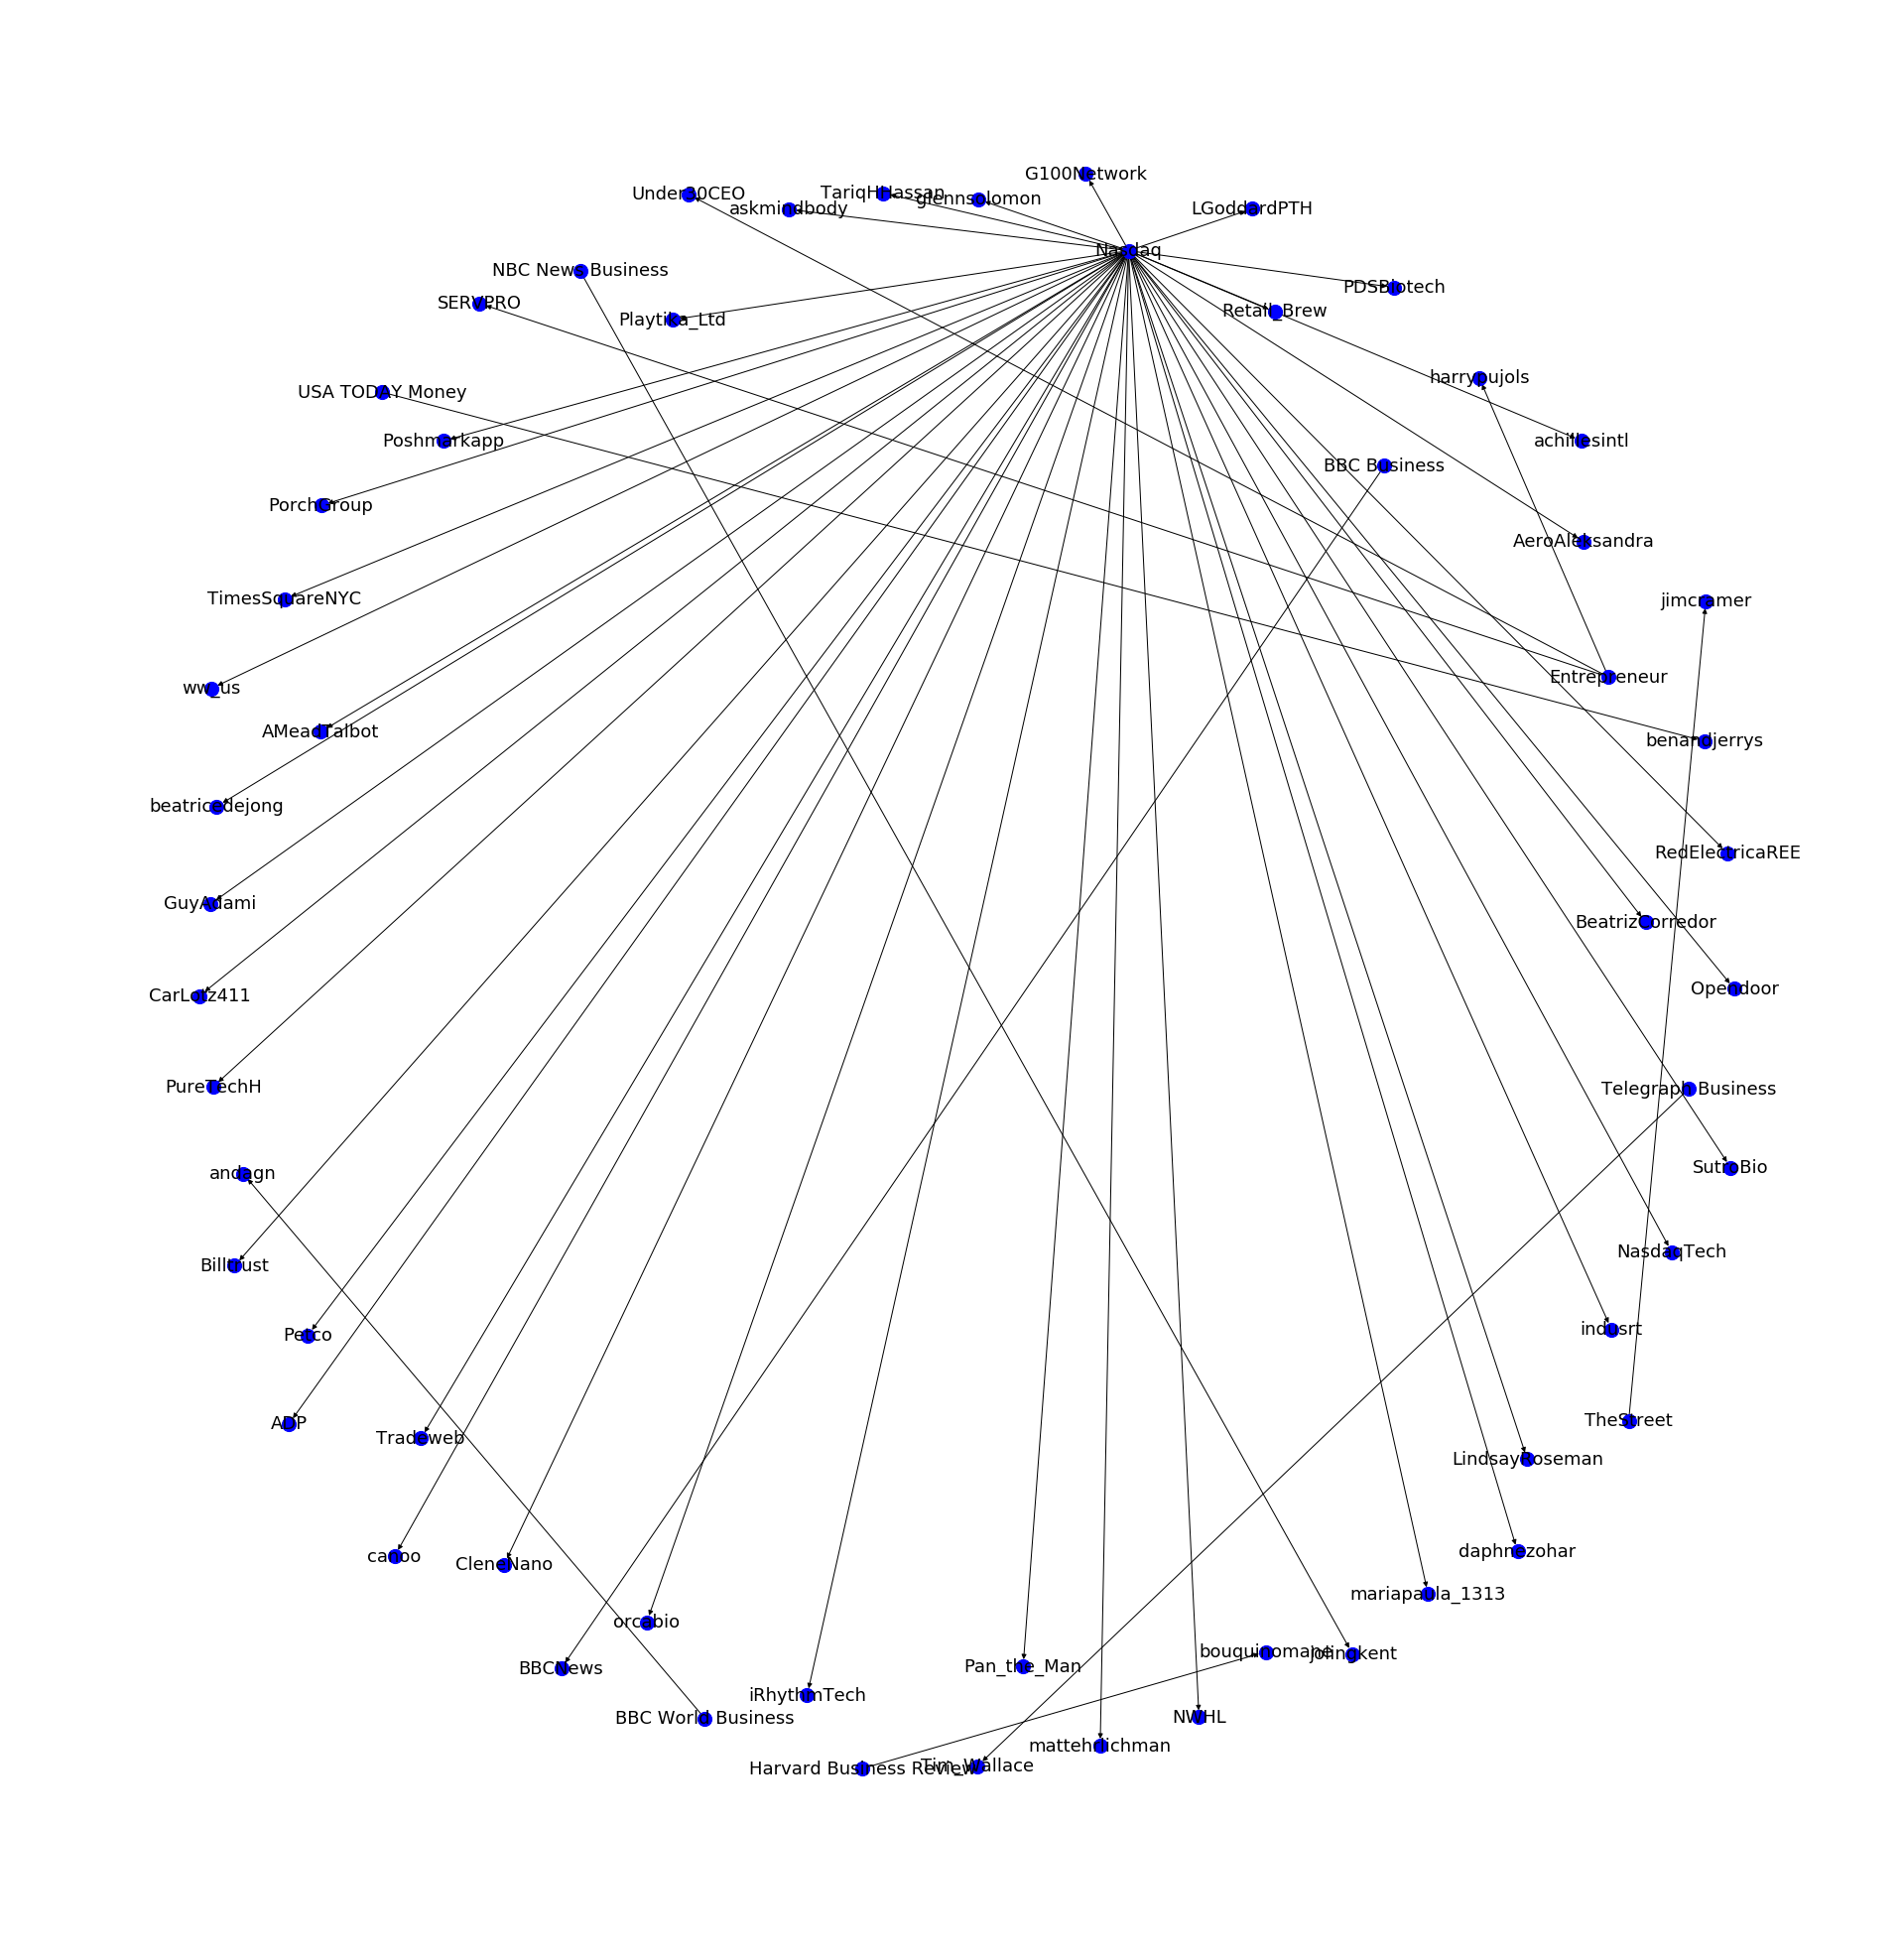

In [148]:
plt.figure(figsize=(26,27))
pos = nx.spring_layout( graph_2, k = 101 )
nx.draw(graph_2,pos, with_labels = True, node_size=200, font_size=18, node_color="blue")

### Transitivity of the graph

In [95]:
triadic_closure = nx.transitivity(graph_2)
print("Triadic closure:", triadic_closure)

Triadic closure: 0


### Density of the network

In [96]:
density = nx.density(graph_2)
print("density of the network:", density)

density of the network: 0.014821536600120993


### Centrality measures for the graph

In [90]:
# degree centrality
deg_2 = nx.degree_centrality(graph_2)
s_2 = pd.Series(deg_2)
data_task_2 = pd.DataFrame(s_2,columns=["degree_centrality"])
#betweenness
bet_2 = nx.betweenness_centrality(graph_2)
data_task_2["betweenness"] = pd.Series(bet_2)
#closeness
close_2 = nx.closeness_centrality(graph_2)
data_task_2["closeness"] = pd.Series(close_2)
#sorting and displaying the first 10 data
data_task_2.sort_values(['degree_centrality', 'betweenness'],ascending=False).head(10)

,degree_centrality,betweenness,closeness
Nasdaq,0.684211,0.0,0.000000
Entrepreneur,0.052632,0.0,0.000000
USA TODAY Money,0.017544,0.0,0.000000
benandjerrys,0.017544,0.0,0.017544
BBC World Business,0.017544,0.0,0.000000
andagn,0.017544,0.0,0.017544
NBC News Business,0.017544,0.0,0.000000
jolingkent,0.017544,0.0,0.017544
G100Network,0.017544,0.0,0.017544
iRhythmTech,0.017544,0.0,0.017544


### Conclusion- Task 2
>-  Nodes will be either Users from the list or Users from the wider Twitter platform
>- From the above table we notice that <b> Nasdaq </b>has the highest statistics in terms of centrality measures
>- Our characteristics also confirm that the network is directed


##  <font color='green'>TASK</font> 3

>- Here nodes will be either users from your list or users from the wider Twitter
platform - i.e. users who are not necessarily members of the list, but were
mentioned in tweets by users on the list

### Adding edges and nodes to the graph

In [154]:
graph_3 = nx.DiGraph()
for i, row in data_tweets.iterrows():
    for j in range(len(row['entities']['user_mentions'])):
        for k in row['entities']['user_mentions'][j]:
            
            graph_3.add_edge(row['user']['name'], row['entities']['user_mentions'][j]['name'])

In [156]:
in_deg = pd.Series(dict( graph_3.in_degree(weight="weight") ), name="w-in-degree")
pd.DataFrame(in_deg).sort_values(by="w-in-degree", ascending=False).head(10)

,w-in-degree
Pfizer Inc.,4
Bloomberg,4
Joe Biden,4
The Wall Street Journal,3
CNBC,3
AlbertBourla,3
Bloomberg Live,3
Bloomberg TV,3
Haslinda Amin,3
Bridgewater Associates,3


### Creating the graph

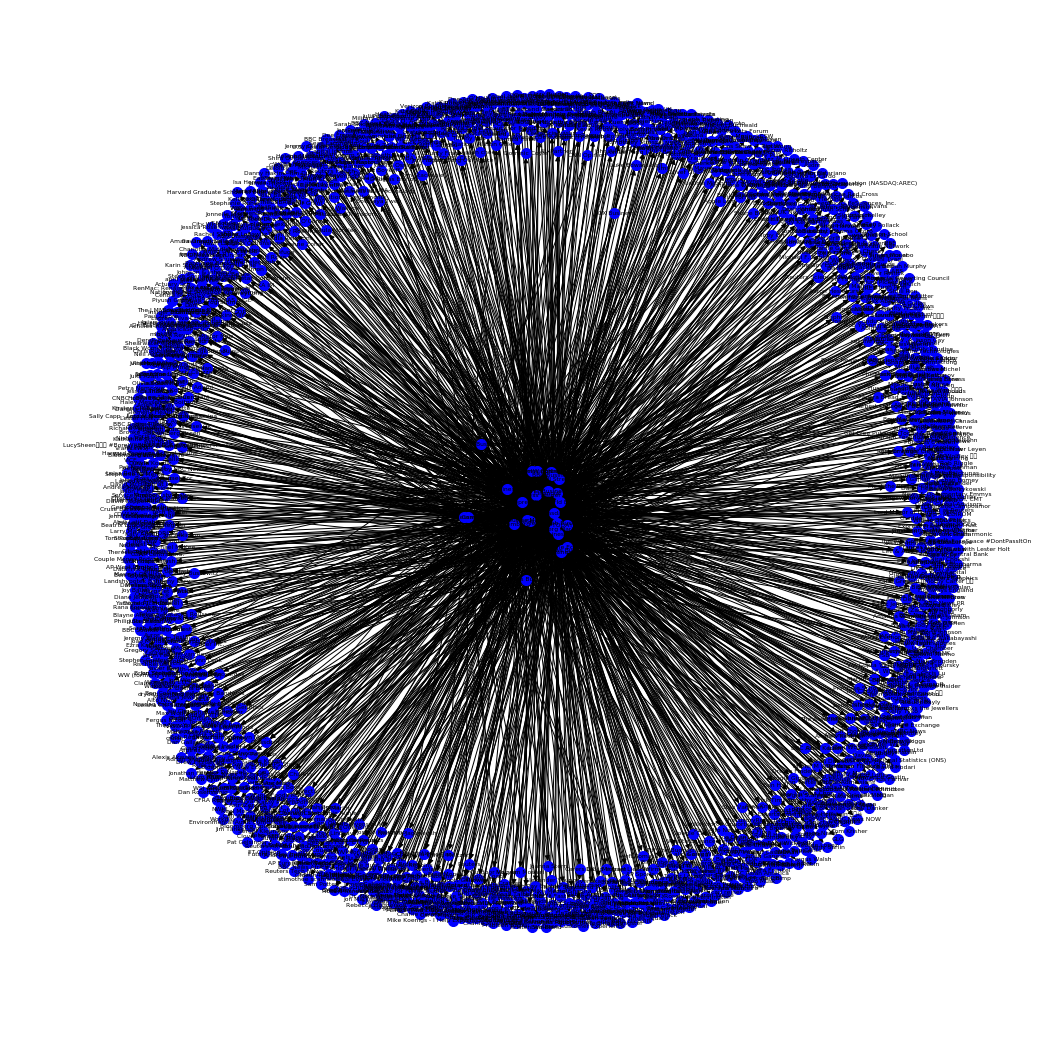

In [151]:
plt.figure(figsize=(14,14))
nx.draw(graph_3, with_labels = True, node_size=101, font_size=6, node_color="blue")

 ### Printing out the general information of the graph

In [157]:
print(nx.info(graph_3))

Name: 
Type: DiGraph
Number of nodes: 1485
Number of edges: 1582
Average in degree:   1.0653
Average out degree:   1.0653


### Printing the density of the graph

In [98]:
density = nx.density(graph_3)
print("density of the network:", density)

density of the network: 0.0007178705291912839


### Transitivity is the ratio of all triangles over all possible triangles.So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.Transitivity allows us a way of thinking about all the relationships in your graph that may exist but currently do not.

In [97]:
triadic_closure = nx.transitivity(graph_3)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.0006394997690695279


In [158]:
# degree centrality
deg_3 = nx.degree_centrality(graph_3)
s_3 = pd.Series(deg_3)
data_task_3 = pd.DataFrame(s_3,columns=["degree_centrality"])
#betweenness
bet_3 = nx.betweenness_centrality(graph_3)
data_task_3["betweenness"] = pd.Series(bet_3)
#closeness
close_3 = nx.closeness_centrality(graph_3)
data_task_3["closeness"] = pd.Series(close_3)
#eigenvector
eig_3 = nx.eigenvector_centrality(graph_3)
data_task_3["eigenvector"] = pd.Series(eig_3)
#norm_eigenvector
data_task_3["norm_eigenvector"] = dataset_3["eigenvector"]/max(dataset_3["eigenvector"])

data_task_3.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Nasdaq,0.134771,0.000000,0.000000,2.781736e-07,1.498750e-06
Reuters Money,0.123315,0.000000,0.000000,2.781736e-07,1.498750e-06
Entrepreneur,0.119946,0.000000,0.000000,2.781736e-07,1.498750e-06
Telegraph Business,0.087601,0.000000,0.000000,2.781736e-07,1.498750e-06
NBC News Business,0.074124,0.000000,0.000000,2.781736e-07,1.498750e-06
Bloomberg Markets,0.068059,0.000097,0.001213,1.147094e-01,6.180340e-01
Business Insider,0.061321,0.000000,0.000000,2.781736e-07,1.498750e-06
NYT Business,0.043127,0.000000,0.000000,2.781736e-07,1.498750e-06
AP Business News,0.033019,0.000000,0.000000,6.632176e-14,3.573298e-13
Harvard Business Review,0.031671,0.000035,0.000674,3.338084e-06,1.798500e-05


### Conclusion- Task 3
>- Nodes are users from the Twitter platform , users who are not necessarily members of the list, but they were mentioned in tweets by users on the list
>- <b>Nasdaq</b> has the highest statitics in terms of centrality measures
>- The network is directed
>- Here we have <b>'Pfizer Inc'</b> with the highest weighted in-degree value.

##  <font color='green'>TASK</font> 4

>- A bipartite network, where one set of nodes will be users from your list, and
the other set of nodes will be hashtags which appear in their tweets.

### Parsing the json file

In [159]:
users = []
fin = open("list_members.jsonl","r")
for line in fin.readlines():
    user = json.loads( line )
    users.append( user )
fin.close()
#printss the number of profiles read
print(len(users))

32


In [160]:
user_names = []
for i, row in data_tweets.iterrows():
    for k in row['user']:
            user_names.append(row['user']['name'])

### Creating list of hastags

In [101]:
hashtag = []
for i, row in df.iterrows():
    for j in range(len(row['entities']['hashtags'])):
        for k in row['entities']['hashtags'][j]:
            hashtag.append(row['entities']['hashtags'][j]['text'])

### Creating the user hashtag pairs

In [161]:
pairs = []
for i, row in data_tweets.iterrows():
    for j in range(len(row['entities']['hashtags'])):
        for k in row['entities']['hashtags'][j]:
            pairs.append((row['user']['name'], row['entities']['hashtags'][j]['text']))
pairs

[('Reuters Money', 'AppleEvent'),
 ('Reuters Money', 'AppleEvent'),
 ('Independent Business', 'sponsored'),
 ('Independent Business', 'sponsored'),
 ('BBC Business', 'Millionby30'),
 ('BBC Business', 'Millionby30'),
 ('BBC World Business', 'Automotive'),
 ('BBC World Business', 'Automotive'),
 ('Forbes', 'DecadeofU30'),
 ('Forbes', 'DecadeofU30'),
 ('USA TODAY Money', 'DoggieDesserts'),
 ('USA TODAY Money', 'DoggieDesserts'),
 ('BBC World Business', 'cruise'),
 ('BBC World Business', 'cruise'),
 ('BBC World Business', 'conference'),
 ('BBC World Business', 'conference'),
 ('Nasdaq', 'COVID19'),
 ('Nasdaq', 'COVID19'),
 ('Nasdaq', 'ChefsForAmerica'),
 ('Nasdaq', 'ChefsForAmerica'),
 ('Telegraph Business', 'InaugurationDay'),
 ('Telegraph Business', 'InaugurationDay'),
 ('Nasdaq', 'NasdaqListed'),
 ('Nasdaq', 'NasdaqListed'),
 ('Reuters Money', 'ReutersNext'),
 ('Reuters Money', 'ReutersNext'),
 ('Nasdaq', 'TradeTalks'),
 ('Nasdaq', 'TradeTalks'),
 ('Independent Business', 'sponsored'),


### Creating the bipartite network

In [167]:
bipartite_graph = nx.Graph()

In [170]:

user_nodes=set()
hastag_nodes = set()
for p in pairs:
    user = p[0]
    hastag = p[1]    
    # create the nodes
    if not user in user_nodes:
        bipartite_graph.add_node(user, bipartite=0)
        user_nodes.add(user)
    if not hastag in htag_nodes:
        bipartite_graph.add_node(hastag, bipartite=1)
        hastag_nodes.add(hastag)    
    # creating the edge 
    hastag_nodes.add(hastag)
    bipartite_graph.add_edge( user, hastag )


In [171]:
print(bipartite_graph.number_of_nodes())

299


In [164]:
print(bipartite_graph.number_of_edges())

315


In [165]:
print(bipartite.is_bipartite(b))


True


###  Displaying the graph

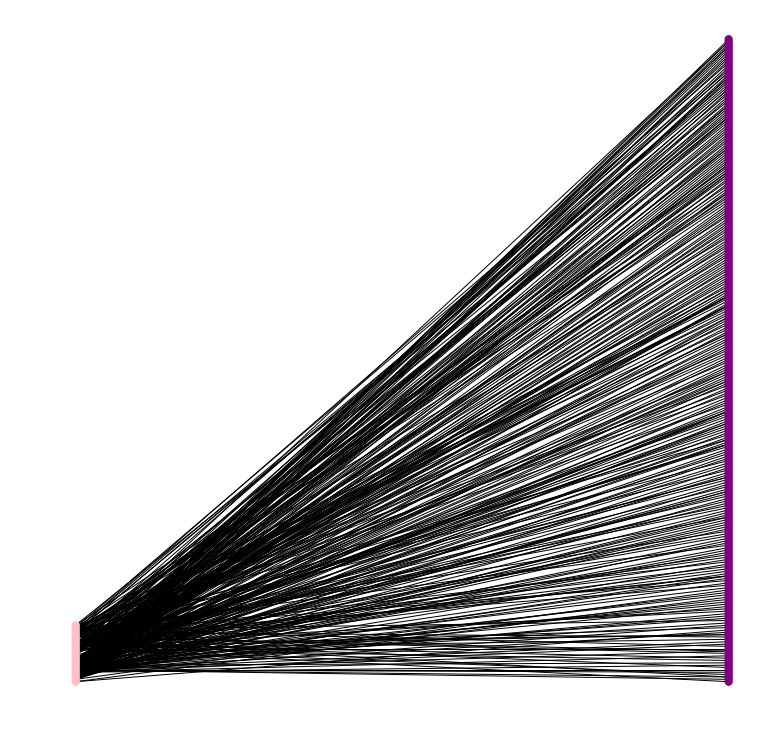

In [174]:
#drawing the network
color_map = {}
pos = {}
for i, node in enumerate(user_nodes):
    pos[node] = (0, i*10)
    color_map[node] = "pink"
for i, node in enumerate(hastag_nodes):
    pos[node] = (1, i*10)
    color_map[node] = "purple"
colors = [color_map[node] for node in bipartite_graph.nodes()]
plt.figure(figsize=(13,13))
nx.draw_networkx(b, pos=pos, with_labels=False, 
        node_size = 52,
        font_size = 10,
        node_color = colors)
plt.axis("off")
plt.show()

### Top 5 hashtags

In [177]:
hastag_wdegrees = dict(b.degree(hastag_nodes, weight="weight"))
hastag_swdeg = pd.Series(hastag_wdegrees, name="w-degree")
hastag_swdeg = hastag_swdeg.sort_values(ascending=False)
pd.DataFrame(hastag_swdeg.head(5))

,w-degree
Bitcoin,5
coronavirus,4
InaugurationDay,4
TheYearAhead,3
COVID19,3


In [178]:
user_wdegrees = dict(b.degree(user_nodes, weight="weight"))
user_swdeg = pd.Series(user_wdegrees, name="w-degree")
user_swdeg = user_swdeg.sort_values(ascending=False)
pd.DataFrame(user_swdeg.head(5))

,w-degree
Reuters Money,54
Nasdaq,50
BBC World Business,30
NBC News Business,29
BBC Business,16


### Printing general information about th graph

In [179]:
print(nx.info(bipartite_graph))

Name: 
Type: Graph
Number of nodes: 299
Number of edges: 315
Average degree:   2.1070


In [180]:
print("Is network directed?", nx.is_directed(b))


Is network directed? False


### Printing the density of the network 

In [181]:
density = nx.density(b)
print("density of the network:", density)

density of the network: 0.007070548360306166


In [113]:
triadic_closure = nx.transitivity(b)
print("Triadic closure:", triadic_closure)

Triadic closure: 0


In [182]:
#degree centrality
deg_4 = nx.degree_centrality(b)
s_4 = pd.Series(deg_4)
data_task_4 = pd.DataFrame(s_4,columns=["degree_centrality"])

#betweensess
bet_4 = nx.betweenness_centrality(b)
data_task_4["betweenness"] = pd.Series(bet_4)

#closeness
close_4 = nx.closeness_centrality(b)
data_task_4["closeness"] = pd.Series(close_4)



data_task_4.sort_values(['degree_centrality', 'betweenness'],ascending=False).head(10)

,degree_centrality,betweenness,closeness
Reuters Money,0.181208,0.325424,0.300273
Nasdaq,0.167785,0.254823,0.266294
BBC World Business,0.100671,0.223420,0.274394
NBC News Business,0.097315,0.240969,0.283002
USA TODAY Money,0.053691,0.078301,0.221593
BBC Business,0.053691,0.077995,0.175301
Bloomberg Markets,0.050336,0.085074,0.225283
Telegraph Business,0.046980,0.063929,0.221593
AP Business News,0.043624,0.083249,0.179071
Business Insider,0.040268,0.001491,0.040268


In [183]:
ds4=data_task_4["betweenness"].rank(ascending = False)
ds4.sort_values()


Reuters Money              1.0
Nasdaq                     2.0
NBC News Business          3.0
BBC World Business         4.0
COVID19                    5.0
jobs                       6.0
coronavirus                7.0
CovidVaccine               8.0
Bloomberg Markets          9.0
InaugurationDay           10.0
AP Business News          11.0
USA TODAY Money           12.0
BBC Business              13.0
Bitcoin                   14.0
Telegraph Business        15.0
Election2020              16.0
stockmarket               17.0
ceosecrets                18.5
WorldBusinessReport       18.5
ICYMI                     20.0
Real Time Economics       21.0
TheStreet                 22.0
Covid19                   23.0
Reuters Business          24.0
Businessweek              25.0
WSJ Business News         26.0
vaccine                   27.0
economy                   28.5
business                  28.5
SmallBiz                  30.5
                         ...  
CEOsecrets               177.0
WorldAtW

### Conclusion- Task 4
>- Here  set of nodes will be users from the list, and the next set of nodes will be hashtags
>- Using the weighted in-degree values, we  note that <b>Reuters Money</b> have the highest stats in terms of the most active users, and <b>#bitcoin</b> is the mostly used hashtag
>- Network is not directed
>- Also,based on our centrality measures, Reuters Money have the highest stats and is a very important node
From the above table we notice that <b> Reuters Money </b>has the highest statistics in terms of centrality measures

##  <font color='green'>TASK</font> 5

>- Here each node will correspond to a hashtag appearing in one or more of the
tweets of list users

In [119]:
user_names = set(user_names)


In [190]:
#creating a map
hashtag_map = {}
for i, row in data_tweets.iterrows():
    if row['user']['screen_name'] in user_names and len(row['entities']['hashtags']) > 0:
        array = []
        for j in range(len(row['entities']['hashtags'])):
            array.append(row['entities']['hashtags'][j]['text'])
        hashtag_map[row['id']] = array

### Displaying the hashtag map

In [191]:
hashtag_map


{1353120326469599232: ['DecadeofU30'],
 1342530189155299333: ['COVID19'],
 1344659290079027203: ['ChefsForAmerica'],
 1350126444534489092: ['NasdaqListed'],
 1346526296000622592: ['TradeTalks'],
 1348667354645987328: ['JPM2021'],
 1345097126888550413: ['GreenVoices'],
 1346127502167732228: ['TradeTalks'],
 1352638333810335752: ['Live'],
 1347981209683587078: ['COVID19'],
 1342485008024563714: ['SmartInvesting'],
 1351938866287177734: ['Franchise500'],
 1343579625541279746: ['SmartInvesting'],
 1348290668297388034: ['NasdaqFam'],
 1352048208114036736: ['ForbesFinds'],
 1353349040059121664: ['GreenVoices'],
 1352613462925594630: ['COVID19'],
 1340733364853223426: ['GreenVoices'],
 1353069654428684288: ['SmartInvesting'],
 1353401875073261569: ['SmartInvesting'],
 1345821960144646148: ['GreenVoices'],
 1343239957410885632: ['SmartInvesting'],
 1350133768284221441: ['NasdaqListed', 'InfiniteWaystoPlay'],
 1349370146251538433: ['AFRM'],
 1353724193863585793: ['ProblemSolvers'],
 13524084576

In [192]:
pair_counts = Counter()
for c in hashtag_map:
    hashtag_pairs = list( itertools.combinations(hashtag_map[c], r=2) )
    print(hashtag_pairs)
    for pair in hashtag_pairs:
        pair_counts[pair] += 1

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('NasdaqListed', 'InfiniteWaystoPlay')]
[]
[]
[('LiveinYourElement', 'NasdaqListed')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('corpgov', 'DrivingExcellence')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('ESG', 'GreenVoices')]
[]
[('ecommerce', 'freelance'), ('ecommerce', 'Shopify'), ('freelance', 'Shopify')]
[]
[]
[]
[('InaugurationDay', 'TradeTalks'), ('InaugurationDay', 'COVID19'), ('TradeTalks', 'COVID19')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('COVID19', 'corpgov')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('COVID19', 'NasdaqFam')]
[]
[]
[]
[]
[]
[]
[('NasdaqListed', 'RewriteTomorrow')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('NasdaqListed', 'PlaytikaIPO'), ('NasdaqListed', 'InfiniteWaysToPlay'), ('PlaytikaIPO', 'InfiniteWaysToPlay')]
[]
[]
[]
[]
[]
[]
[]
[('GreenVoices', 'TradeTalks')]
[('WWTeam', 'WellnessWeek')]
[]
[]
[]
[('ESG', 'WSJFuture')]
[]
[]
[]
[]
[]
[('GreenV

In [186]:
graph_5 = nx.Graph()
for pair in pair_counts:
    graph_5.add_edge( pair[0], pair[1], weight=pair_counts[pair] )

### Pair of hashtags that occur together

In [187]:
dfg = nx.to_pandas_edgelist(g)
dfg.sort_values(by="weight",ascending=False).head(20)

,source,target,weight
22,InaugurationDay,TradeTalks,2
11,corpgov,DrivingExcellence,2
2,NasdaqListed,RewriteTomorrow,2
17,GreenVoices,COVID19,2
14,ESG,GreenVoices,2
28,NasdaqFam,ConfettiWish,2
12,corpgov,COVID19,2
23,InaugurationDay,COVID19,1
24,TradeTalks,COVID19,1
25,COVID19,NasdaqFam,1


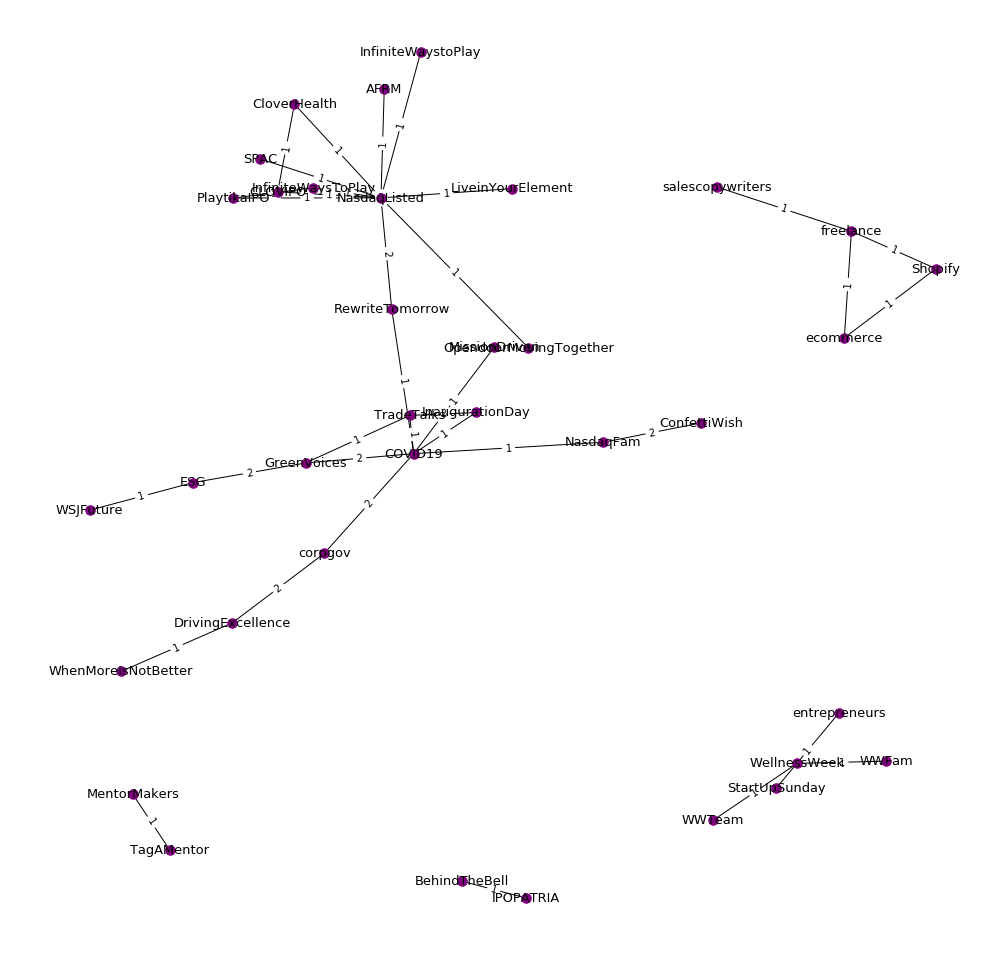

In [199]:
#graph is drawn
plt.figure( figsize=(13,13) ) 
pos = nx.spring_layout( graph_5, k=0.4 )
# draw the nodes 
nx.draw(graph_5, pos, with_labels = True, node_size=90, font_size=13, node_color="purple")
labels = nx.get_edge_attributes(graph_5, 'weight')
nx.draw_networkx_edge_labels(graph_5, pos,edge_labels=labels);

### Printing the general information about the graph

In [189]:
print(nx.info(graph_5))

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 36
Average degree:   2.0000


In [196]:
#degree centrality
deg_5 = nx.degree_centrality(g)
s_5 = pd.Series(deg_5)
data_task_5 = pd.DataFrame(s_5,columns=["degree_centrality"])

#betweenness
bet_5 = nx.betweenness_centrality(g)
data_task_5["betweenness"] = pd.Series(bet_5)

#Closeness 
close_5 = nx.closeness_centrality(g)
data_task_5["closeness"] = pd.Series(close_5)


# display dataframe
data_task_5.sort_values(['degree_centrality', 'betweenness'],ascending=False).head(10)

,degree_centrality,betweenness,closeness
NasdaqListed,0.342857,0.253782,0.265934
COVID19,0.200000,0.274790,0.288095
GreenVoices,0.085714,0.067227,0.216071
freelance,0.085714,0.003361,0.085714
TradeTalks,0.085714,0.002521,0.212747
RewriteTomorrow,0.057143,0.201681,0.282216
corpgov,0.057143,0.067227,0.212747
DrivingExcellence,0.057143,0.035294,0.164626
ESG,0.057143,0.035294,0.166609
NasdaqFam,0.057143,0.035294,0.206397


In [197]:
ds5=data_task_5["betweenness"].rank(ascending = False)
ds5.sort_values()

COVID19                    1.0
NasdaqListed               2.0
RewriteTomorrow            3.0
corpgov                    4.5
GreenVoices                4.5
DrivingExcellence          7.0
ESG                        7.0
NasdaqFam                  7.0
freelance                  9.0
TradeTalks                10.0
WellnessWeek              11.0
WWFam                     24.0
salescopywriters          24.0
MentorMakers              24.0
TagAMentor                24.0
SPAC                      24.0
ConfettiWish              24.0
WhenMoreIsNotBetter       24.0
CloverHealth              24.0
CLOVIPO                   24.0
BehindTheBell             24.0
IPOPATRIA                 24.0
WWTeam                    24.0
StartUpSunday             24.0
AFRM                      24.0
WSJFuture                 24.0
OpendoorMovingTogether    24.0
InfiniteWaysToPlay        24.0
PlaytikaIPO               24.0
InaugurationDay           24.0
Shopify                   24.0
ecommerce                 24.0
LiveinYo

### Conclusion- Task 5
>- Here each node  represents a hashtag appearing 
>- Using the weighted in-degree values, we note that <b>Tradetalks and Inauguration day</b> have the highest values.
>- Network is not directed
>- Based on our centrality measures, <b>NasDaq</b> Listed have the highest stats and is important.
>-In terms of betweennes , <b>COVID19</b> has the highest rank

### REFERENCES

>- The network characteristics code for each tasks is  taken from my last assignment submission.
>- Some references taken from https://github.com/Surabhi98/Network-Analysis-using-Python/blob/master/Twitter%20Data%20Analysis/SurabhiAgarwal_17203535_A2_Final.ipynb
>- The code for the bipartite graph is taken from Lab 7
>- https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/